In [11]:
import seaborn as sns
import plotly
import numpy as np
import pandas as pd
import xgboost

### 导入数据

In [12]:
df=pd.read_csv('.\data\cs-training.csv')

### 看数据分布

In [22]:
df=df[['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']]

In [23]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 1.重命名

In [26]:
df.rename(columns={'SeriousDlqin2yrs':'target',
'RevolvingUtilizationOfUnsecuredLines':'credit_used_rate',
'age':'age',
'NumberOfTime30-59DaysPastDueNotWorse':'has_30_59_due_times',
'DebtRatio':'debt_ratio',
'MonthlyIncome':'income',
'NumberOfOpenCreditLinesAndLoans':'credit_loan_num',
'NumberOfTimes90DaysLate':'has_90_plus_due_times',
'NumberRealEstateLoansOrLines':'realestate_loan_num',
'NumberOfTime60-89DaysPastDueNotWorse':'has_60_89_due_times',
'NumberOfDependents':'relatives_num'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 2.看数据分布

In [29]:
df.describe()

,target,credit_used_rate,age,has_30_59_due_times,debt_ratio,income,credit_loan_num,has_90_plus_due_times,realestate_loan_num,has_60_89_due_times,relatives_num
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [32]:
print("bad_rate:",df['target'].sum()*1.00/df['target'].count())

bad_rate: 0.06684


### 3.寻找缺失变量
- relatives_num
- income

In [40]:
df.isna().sum()

target                       0
credit_used_rate             0
age                          0
has_30_59_due_times          0
debt_ratio                   0
income                   29731
credit_loan_num              0
has_90_plus_due_times        0
realestate_loan_num          0
has_60_89_due_times          0
relatives_num             3924
dtype: int64

In [63]:
## 如下方法不对，应该count不会统计缺失值，所以应该用len
df.isna().sum()/df.count()

target                   0.000000
credit_used_rate         0.000000
age                      0.000000
has_30_59_due_times      0.000000
debt_ratio               0.000000
income                   0.247204
credit_loan_num          0.000000
has_90_plus_due_times    0.000000
realestate_loan_num      0.000000
has_60_89_due_times      0.000000
relatives_num            0.026863
relatives_num_fillna     0.000000
income_fillna            0.000000
dtype: float64

In [62]:
df.isna().sum()/len(df)

target                   0.000000
credit_used_rate         0.000000
age                      0.000000
has_30_59_due_times      0.000000
debt_ratio               0.000000
income                   0.198207
credit_loan_num          0.000000
has_90_plus_due_times    0.000000
realestate_loan_num      0.000000
has_60_89_due_times      0.000000
relatives_num            0.026160
relatives_num_fillna     0.000000
income_fillna            0.000000
dtype: float64

### 4. 数据填充

In [54]:
df['relatives_num_fillna']=df.relatives_num.fillna(df.relatives_num.median())

In [56]:
df['income_fillna']=df.income.fillna(df.income.median())

In [57]:
df.isna().sum()/df.count()

target                   0.000000
credit_used_rate         0.000000
age                      0.000000
has_30_59_due_times      0.000000
debt_ratio               0.000000
income                   0.247204
credit_loan_num          0.000000
has_90_plus_due_times    0.000000
realestate_loan_num      0.000000
has_60_89_due_times      0.000000
relatives_num            0.026863
relatives_num_fillna     0.000000
income_fillna            0.000000
dtype: float64

In [71]:
var_list=['credit_used_rate',
'age',
'has_30_59_due_times',
'debt_ratio',
'income_fillna',
'credit_loan_num',
'has_90_plus_due_times',
'realestate_loan_num',
'has_60_89_due_times',
'relatives_num_fillna']

### 5.寻找异常值

#### 异常值结果：

In [ ]:
'''
credit_used_rate>15
debt_ratio 超过98分位数

'''

In [65]:
df[var_list].describe()

,target,credit_used_rate,age,has_30_59_due_times,debt_ratio,income_fillna,credit_loan_num,has_90_plus_due_times,realestate_loan_num,has_60_89_due_times,relatives_num_fillna
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


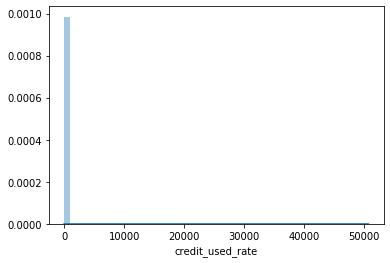

In [82]:
sns.distplot(df['credit_used_rate'])

In [99]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', 200)

#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [100]:
### 使用率超过15倍的定义为异常值，需要剔除
df[df['credit_used_rate']>15]['credit_used_rate']

293        2340.000000
697        2066.000000
1991       1143.000000
2331       6324.000000
4278       1982.000000
              ...     
148828       73.846154
149102     6109.000000
149160    22000.000000
149245      771.000000
149279    20514.000000
Name: credit_used_rate, Length: 235, dtype: float64

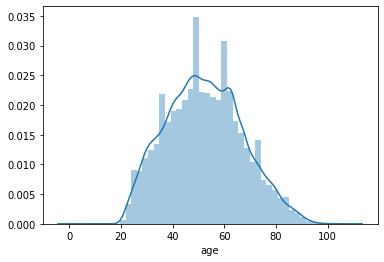

In [74]:
sns.distplot(df['age'])

In [89]:
df[df['age']>100]['age']

7763      101
19884     103
25561     102
40007     107
56761     105
57967     103
90937     102
93813     101
96450     102
105790    109
116129    101
135025    103
138291    109
Name: age, dtype: int64

### debt_ratio 字段

In [109]:
len(df[df['debt_ratio']>500])/len(df)

0.13734666666666667

In [107]:
df["debt_ratio"].quantile(0.95)

2449.0

In [93]:
df.select_dtypes(include=['number']).columns

Index(['target', 'credit_used_rate', 'age', 'has_30_59_due_times',
       'debt_ratio', 'income', 'credit_loan_num', 'has_90_plus_due_times',
       'realestate_loan_num', 'has_60_89_due_times', 'relatives_num',
       'relatives_num_fillna', 'income_fillna'],
      dtype='object')

In [167]:
df["age"].value_counts().sort_index()

0         1
21      183
22      434
23      641
24      815
25      951
26     1190
27     1334
28     1557
29     1689
30     1931
31     2025
32     2038
33     2212
34     2128
35     2215
36     2340
37     2479
38     2583
39     2936
40     3031
41     3050
42     3017
43     3125
44     3213
45     3416
46     3615
47     3607
48     3676
49     3747
50     3677
51     3542
52     3493
53     3553
54     3459
55     3314
56     3469
57     3256
58     3341
59     3199
60     3166
61     3423
62     3461
63     3586
64     2975
65     2514
66     2420
67     2445
68     2195
69     1900
70     1739
71     1616
72     1639
73     1495
74     1437
75     1224
76     1167
77     1092
78     1044
79      975
80      873
81      771
82      644
83      506
84      476
85      481
86      405
87      355
88      311
89      275
90      198
91      153
92       92
93       87
94       46
95       45
96       18
97       17
98        6
99        9
101       3
102       3
103       3
105 

### 6.排除异常区间的数据

In [110]:
df = df.loc[df["debt_ratio"] <= df["debt_ratio"].quantile(0.98)]
df = df.loc[(df["credit_used_rate"] >= 0) & (df["credit_used_rate"] <= 15)]

In [111]:
df.describe()

,target,credit_used_rate,age,has_30_59_due_times,debt_ratio,income,credit_loan_num,has_90_plus_due_times,realestate_loan_num,has_60_89_due_times,relatives_num,relatives_num_fillna,income_fillna
count,146776.000000,146776.000000,146776.000000,146776.000000,146776.000000,1.199450e+05,146776.000000,146776.000000,146776.000000,146776.000000,143033.000000,146776.000000,1.467760e+05
mean,0.066857,0.322663,52.264682,0.423530,227.791607,6.676219e+03,8.387148,0.270691,0.989065,0.244550,0.760957,0.741552,6.442923e+03
std,0.249775,0.376081,14.844847,4.236865,665.748426,1.439978e+04,5.116647,4.214373,1.099677,4.200259,1.116325,1.108509,1.302659e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.029499,41.000000,0.000000,0.170783,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.850000e+03
50%,0.000000,0.151698,52.000000,0.000000,0.358007,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.400000e+03
75%,0.000000,0.555149,63.000000,0.000000,0.775697,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,1.000000,7.500000e+03
max,1.000000,14.540918,109.000000,98.000000,3839.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,20.000000,3.008750e+06


## 二、特征工程

### 7.分桶

In [113]:
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df['bin_age'] = pd.cut(df['age'],bins=age_bins).astype(str)
relatives_bin = [-math.inf,2,4,6,8,10,math.inf]
df['bin_relatives_num_fillna'] = pd.cut(df['relatives_num_fillna'],bins=relatives_bin).astype(str)
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df['bin_has_90_plus_due_times'] = pd.cut(df['has_90_plus_due_times'],bins=dpd_bins)
df['bin_has_30_59_due_times'] = pd.cut(df['has_30_59_due_times'], bins=dpd_bins)
df['bin_has_60_89_due_times'] = pd.cut(df['has_60_89_due_times'], bins=dpd_bins)

df['bin_credit_used_rate'] = pd.qcut(df['credit_used_rate'],q=5,duplicates='drop').astype(str)
df['bin_debt_ratio'] = pd.qcut(df['debt_ratio'],q=5,duplicates='drop').astype(str)
df['bin_income_fillna'] = pd.qcut(df['income_fillna'],q=5,duplicates='drop').astype(str)
df['bin_credit_loan_num'] = pd.qcut(df['credit_loan_num'],q=5,duplicates='drop').astype(str)
df['bin_realestate_loan_num'] = pd.qcut(df['realestate_loan_num'],q=5,duplicates='drop').astype(str)


In [117]:
bin_var_list=[c for c in df.columns.values if c.startswith('bin')]

In [118]:
bin_var_list

['bin_age',
 'bin_relatives_num_fillna',
 'bin_has_90_plus_due_times',
 'bin_has_30_59_due_times',
 'bin_has_60_89_due_times',
 'bin_credit_used_rate',
 'bin_debt_ratio',
 'bin_income_fillna',
 'bin_credit_loan_num',
 'bin_realestate_loan_num']

In [119]:
df[bin_var_list].head()

,bin_age,bin_relatives_num_fillna,bin_has_90_plus_due_times,bin_has_30_59_due_times,bin_has_60_89_due_times,bin_credit_used_rate,bin_debt_ratio,bin_income_fillna,bin_credit_loan_num,bin_realestate_loan_num
0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(0.695, 14.541]","(0.454, 1.399]","(8333.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]"
1,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.695, 14.541]","(-0.001, 0.13]","(-0.001, 3350.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.268, 0.695]","(-0.001, 0.13]","(-0.001, 3350.0]","(-0.001, 4.0]","(-0.001, 1.0]"
3,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0819, 0.268]","(-0.001, 0.13]","(-0.001, 3350.0]","(4.0, 6.0]","(-0.001, 1.0]"
4,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.695, 14.541]","(-0.001, 0.13]","(8333.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]"


### 8.对变量筛选，计算iv值，用iv大于0.2的变量，并进行woe编码

In [130]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        
        val = list(df[feature].unique())[i]
        #变量名字，val表示对应的分类值，比如'(40.0, 50.0]',第3个参数是某一变量为特定分桶的数据行数，第四个参数是某一变量为特定分桶且target为1的数量
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
#     print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    #每个变量中，每一个bin下，坏客户数/总体坏客户数
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [132]:
for f in bin_var_list:
    print("var_name:",f,cal_IV(df,f,'target'), 1 if cal_IV(df,f,'target')>=0.2 else 0)

var_name: bin_age 0.24248493558912076 1
var_name: bin_relatives_num_fillna 0.01566581065106161 0
var_name: bin_has_90_plus_due_times 0.4956403181130078 1
var_name: bin_has_30_59_due_times 0.49243045769787136 1
var_name: bin_has_60_89_due_times 0.2670979981180916 1
var_name: bin_credit_used_rate 1.0747519217102215 1
var_name: bin_debt_ratio 0.04695798064733451 0
var_name: bin_income_fillna 0.07064515033653784 0
var_name: bin_credit_loan_num 0.050279871822513936 0
var_name: bin_realestate_loan_num 0.013123637295285505 0


In [133]:
feature=['bin_age','bin_has_90_plus_due_times','bin_has_30_59_due_times','bin_has_60_89_due_times','bin_credit_used_rate']

In [127]:
df[df['bin_age']=='(40.0, 50.0]'].count()['bin_age']

34143

In [129]:
df[(df['bin_age']=='(40.0, 50.0]')&(df['target']==1)].count()['bin_age']

2821

### 计算woe

In [134]:
def cal_WOE(df,features,target):
    df_new = df
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad'})
        df_woe = df_woe.rename(columns = {target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe = df_woe[[f,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad']/df_woe['bad'].sum()
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        df_woe['woe'] = df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1)
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new

In [135]:
# 我们根据IV选出来的特征
df_woe = cal_WOE(df,feature,'target')
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

,woe_bin_age,woe_bin_has_90_plus_due_times,woe_bin_has_30_59_due_times,woe_bin_has_60_89_due_times,woe_bin_credit_used_rate
0,1.257057,0.836495,5.035310,0.906297,3.493784
1,1.592905,0.836495,0.773287,0.906297,3.493784
2,1.592905,0.836495,0.773287,0.906297,1.044587
3,1.592905,0.836495,0.773287,0.906297,0.411157
4,1.257057,0.836495,0.773287,0.906297,3.493784
...,...,...,...,...,...
146771,1.257057,0.836495,0.773287,0.906297,1.044587
146772,0.319533,0.836495,0.773287,0.906297,0.235950
146773,1.257057,0.836495,0.773287,0.906297,1.044587
146774,1.592905,0.836495,0.773287,0.906297,0.273406


In [166]:
df_woe.head(10)

,target,credit_used_rate,age,has_30_59_due_times,debt_ratio,income,credit_loan_num,has_90_plus_due_times,realestate_loan_num,has_60_89_due_times,relatives_num,relatives_num_fillna,income_fillna,bin_age,bin_relatives_num_fillna,bin_has_90_plus_due_times,bin_has_30_59_due_times,bin_has_60_89_due_times,bin_credit_used_rate,bin_debt_ratio,bin_income_fillna,bin_credit_loan_num,bin_realestate_loan_num,good_bin_age,bad_bin_age,bad_rate_bin_age,good_rate_bin_age,woe_bin_age,good_bin_has_90_plus_due_times,bad_bin_has_90_plus_due_times,bad_rate_bin_has_90_plus_due_times,good_rate_bin_has_90_plus_due_times,woe_bin_has_90_plus_due_times,good_bin_has_30_59_due_times,bad_bin_has_30_59_due_times,bad_rate_bin_has_30_59_due_times,good_rate_bin_has_30_59_due_times,woe_bin_has_30_59_due_times,good_bin_has_60_89_due_times,bad_bin_has_60_89_due_times,bad_rate_bin_has_60_89_due_times,good_rate_bin_has_60_89_due_times,woe_bin_has_60_89_due_times,good_bin_credit_used_rate,bad_bin_credit_used_rate,bad_rate_bin_credit_used_rate,good_rate_bin_credit_used_rate,woe_bin_credit_used_rate
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2.0,9120.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(0.695, 14.541]","(0.454, 1.399]","(8333.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]",31322,2821,0.287476,0.228690,1.257057,135586,8126,0.828085,0.989946,0.836495,3293,1188,0.121064,0.024043,5.035310,136093,8837,0.90054,0.993648,0.906297,23478,5877,0.598899,0.171419,3.493784
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,1.0,2600.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.695, 14.541]","(-0.001, 0.13]","(-0.001, 3350.0]","(-0.001, 4.0]","(-0.001, 1.0]",28442,3246,0.330786,0.207662,1.592905,135586,8126,0.828085,0.989946,0.836495,131742,7299,0.743809,0.961880,0.773287,136093,8837,0.90054,0.993648,0.906297,23478,5877,0.598899,0.171419,3.493784
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.0,3042.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.268, 0.695]","(-0.001, 0.13]","(-0.001, 3350.0]","(-0.001, 4.0]","(-0.001, 1.0]",28442,3246,0.330786,0.207662,1.592905,135586,8126,0.828085,0.989946,0.836495,131742,7299,0.743809,0.961880,0.773287,136093,8837,0.90054,0.993648,0.906297,27311,2044,0.208295,0.199404,1.044587
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.0,3300.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0819, 0.268]","(-0.001, 0.13]","(-0.001, 3350.0]","(4.0, 6.0]","(-0.001, 1.0]",28442,3246,0.330786,0.207662,1.592905,135586,8126,0.828085,0.989946,0.836495,131742,7299,0.743809,0.961880,0.773287,136093,8837,0.90054,0.993648,0.906297,28515,840,0.085601,0.208195,0.411157
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.0,63588.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.695, 14.541]","(-0.001, 0.13]","(8333.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]",31322,2821,0.287476,0.228690,1.257057,135586,8126,0.828085,0.989946,0.836495,131742,7299,0.743809,0.961880,0.773287,136093,8837,0.90054,0.993648,0.906297,23478,5877,0.598899,0.171419,3.493784
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,1.0,3500.0,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0819, 0.268]","(0.281, 0.454]","(3350.0, 5297.0]","(-0.001, 4.0]","(-0.001, 1.0]",17079,391,0.039845,0.124698,0.319533,135586,8126,0.828085,0.989946,0.836495,131742,7299,0.743809,0.961880,0.773287,136093,8837,0.90054,0.993648,0.906297,28515,840,0.085601,0.208195,0.411157
6,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,0.0,3500.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.695, 14.541]","(0.13, 0.281]","(3350.0, 5297.0]","(6.0, 9.0]","(-0.001, 1.0]",28442,3246,0.330786,0.207662,1.592905,135586,8126,0.828085,0.989946,0.836495,131742,7299,0.743809,0.961880,0.773287,136093,8837,0.90054,0.993648,0.906297,23478,5877,0.598899,0.171419,3.493784
7,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,0.0,5400.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]

In [137]:
df_woe[woe_cols]

,woe_bin_age,woe_bin_has_90_plus_due_times,woe_bin_has_30_59_due_times,woe_bin_has_60_89_due_times,woe_bin_credit_used_rate
0,1.257057,0.836495,5.035310,0.906297,3.493784
1,1.592905,0.836495,0.773287,0.906297,3.493784
2,1.592905,0.836495,0.773287,0.906297,1.044587
3,1.592905,0.836495,0.773287,0.906297,0.411157
4,1.257057,0.836495,0.773287,0.906297,3.493784
...,...,...,...,...,...
146771,1.257057,0.836495,0.773287,0.906297,1.044587
146772,0.319533,0.836495,0.773287,0.906297,0.235950
146773,1.257057,0.836495,0.773287,0.906297,1.044587
146774,1.592905,0.836495,0.773287,0.906297,0.273406


In [ ]:
'''
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df=df[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
    df_bin_to_woe
'''

## 三、建模

### 9.开始建模

In [266]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['target'], test_size=0.3, random_state=42)

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42).fit(X_train,y_train)

In [140]:
TRAIN_CONFIGS = {
    "model_params": {
        'min_child_weight': list(range(1,10,2)),
        'gamma':[i/10.0 for i in range(0,5)],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree':[i/10.0 for i in range(6,10)],
        'max_depth':range(3,10,2),
        'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
        'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.2, 0.4, 0.6, 0.8, 1],
        'learning_rate': [0.001, 0.002, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2],
        'n_estimators': [50, 100, 150, 200, 250, 300,350,400,450,500, 550, 600, 650, 700, 750],
        "booster": ["gbtree", "gblinear", "dart"]
        }
}

In [ ]:
# Train Model
print("Training Model...")
xgb = XGBClassifier(random_state=0)
model = RandomizedSearchCV(xgb, param_distributions=TRAIN_CONFIGS["model_params"], n_iter=400, scoring='roc_auc', n_jobs=-1, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state = 0), verbose=3, random_state=0)
model.fit(X_train, y_train, eval_metric="auc")
print("Done...\n")

### 10.保存模型

In [147]:
import os
os.getcwd()

'D:\\Data_Science\\jupyter_notebook\\Credit_ScoreCard'

In [149]:
# Save Model
import joblib
print("Saving Model...")
joblib.dump(model, open('./model_output/model.p', "wb"))
print("Completed!")

Saving Model...
Completed!


## 四、对测试数据评估

In [240]:
#在验证集上看性能
model.score(X_test,y_test)

0.9367519814684441

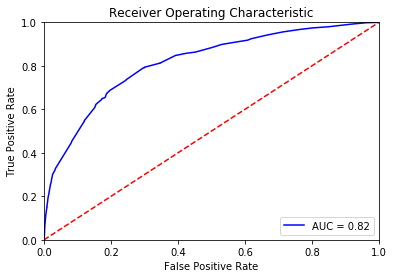

In [241]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [154]:
#混淆矩阵
y_pred = model.predict(X_test)

In [247]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [187]:
model.predict_proba(X_test)

array([[0.87648412, 0.12351588],
       [0.98261431, 0.01738569],
       [0.96316198, 0.03683802],
       ...,
       [0.98084564, 0.01915436],
       [0.98122333, 0.01877667],
       [0.96572118, 0.03427882]])

In [208]:
y_proba=model.predict_proba(X_test)[:,1]

In [209]:
y_proba

array([0.12351588, 0.01738569, 0.03683802, ..., 0.01915436, 0.01877667,
       0.03427882])

In [155]:
metrics.confusion_matrix(y_test,y_pred)

array([[40879,   250],
       [ 2535,   369]], dtype=int64)

In [156]:
model.coef_

array([[0.54675438, 0.09571661, 0.17776475, 0.06469633, 0.54196886]])

### ks值计算

In [270]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
ks=max(tpr-fpr)
print('ks:',ks)

ks: 0.4940749062263079


### 对训练数据集作平衡处理,暂时先不处理再平衡

In [160]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
over_samples = SMOTE(random_state=1234) 
over_samples_X,over_samples_y = over_samples.fit_resample(X_train, y_train)

In [161]:
over_samples_model = LogisticRegression(random_state=42).fit(over_samples_X,over_samples_y)

In [163]:
#在验证集上看性能
over_samples_model.score(X_test,y_test)

0.8000590466241229

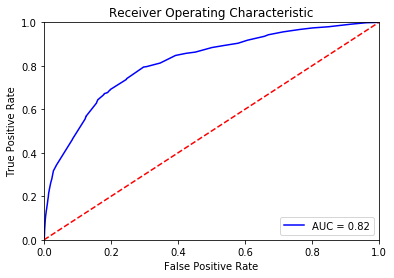

In [164]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = over_samples_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 需要计算A和B的话，我们设置两个参数
1. 基准分。我们设θ_0为20：1时的多数风控策略基准分都设置为650，我们就试试650吧，基准分为A-B\theta_0
2. PDO（point of double），比率翻番时分数的变动值。假设我们设置为当odds翻倍时，分值减少30。

而A、B计算公式（推导过程详见我的知乎专栏 https://zhuanlan.zhihu.com/p/148102950）

![image.png](attachment:image.png)


In [ ]:
for index,row in df.iterrows():
    print(row)